In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [3]:
df = pd.read_csv('C:/Users/w7e7r/Desktop/스파르타/심화프로젝트/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


# 이상치 제거

In [47]:
# 이상치를 제거할 열들의 이름 리스트
columns_to_clean = ['부채_대비_소득_비율', '연간소득', '총상환원금', '총상환이자', '총계좌수']

for col in columns_to_clean:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    cleaned_df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

    cleaned_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 79886 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            79886 non-null  object 
 1   대출금액          79886 non-null  int64  
 2   대출기간          79886 non-null  object 
 3   근로기간          79886 non-null  object 
 4   주택소유상태        79886 non-null  object 
 5   연간소득          79886 non-null  int64  
 6   부채_대비_소득_비율   79886 non-null  float64
 7   총계좌수          79886 non-null  int64  
 8   대출목적          79886 non-null  object 
 9   최근_2년간_연체_횟수  79886 non-null  int64  
 10  총상환원금         79886 non-null  int64  
 11  총상환이자         79886 non-null  float64
 12  총연체금액         79886 non-null  float64
 13  연체계좌수         79886 non-null  float64
 14  대출등급          79886 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 9.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 78216 entries, 0 to 96293
Data columns (total 15 columns):

In [48]:
df2 = cleaned_df.copy()

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79886 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            79886 non-null  object 
 1   대출금액          79886 non-null  int64  
 2   대출기간          79886 non-null  object 
 3   근로기간          79886 non-null  object 
 4   주택소유상태        79886 non-null  object 
 5   연간소득          79886 non-null  int64  
 6   부채_대비_소득_비율   79886 non-null  float64
 7   총계좌수          79886 non-null  int64  
 8   대출목적          79886 non-null  object 
 9   최근_2년간_연체_횟수  79886 non-null  int64  
 10  총상환원금         79886 non-null  int64  
 11  총상환이자         79886 non-null  float64
 12  총연체금액         79886 non-null  float64
 13  연체계좌수         79886 non-null  float64
 14  대출등급          79886 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 9.8+ MB


## 근로기간

In [50]:
mapping ={'6 years' : 6, '10+ years' : 10, '5 years': 5, '8 years': 8, 'Unknown' : -1, '9 years' : 9, '2 years' : 2, 
 '1 year':1, '3 years' :3, '7 years':7, '4 years': 4, '< 1 year':0 ,'10+years' :10, '<1 year' : 0,
 '3' : 3, '1 years':1}
df2['근로시간2']=df['근로기간'].map(mapping)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79886 entries, 0 to 96293
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            79886 non-null  object 
 1   대출금액          79886 non-null  int64  
 2   대출기간          79886 non-null  object 
 3   근로기간          79886 non-null  object 
 4   주택소유상태        79886 non-null  object 
 5   연간소득          79886 non-null  int64  
 6   부채_대비_소득_비율   79886 non-null  float64
 7   총계좌수          79886 non-null  int64  
 8   대출목적          79886 non-null  object 
 9   최근_2년간_연체_횟수  79886 non-null  int64  
 10  총상환원금         79886 non-null  int64  
 11  총상환이자         79886 non-null  float64
 12  총연체금액         79886 non-null  float64
 13  연체계좌수         79886 non-null  float64
 14  대출등급          79886 non-null  object 
 15  근로시간2         79886 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 10.4+ MB


## 주택소유상태

In [52]:
# '주택소유상태' 열에서 값이 'any'인 행을 삭제합니다.
df2 = df2.drop(df[df['주택소유상태'] == 'any'].index)

# 결과를 확인합니다.
df2.info()


<class 'pandas.core.frame.DataFrame'>
Index: 79886 entries, 0 to 96293
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            79886 non-null  object 
 1   대출금액          79886 non-null  int64  
 2   대출기간          79886 non-null  object 
 3   근로기간          79886 non-null  object 
 4   주택소유상태        79886 non-null  object 
 5   연간소득          79886 non-null  int64  
 6   부채_대비_소득_비율   79886 non-null  float64
 7   총계좌수          79886 non-null  int64  
 8   대출목적          79886 non-null  object 
 9   최근_2년간_연체_횟수  79886 non-null  int64  
 10  총상환원금         79886 non-null  int64  
 11  총상환이자         79886 non-null  float64
 12  총연체금액         79886 non-null  float64
 13  연체계좌수         79886 non-null  float64
 14  대출등급          79886 non-null  object 
 15  근로시간2         79886 non-null  int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 10.4+ MB


# 히스토그램 확인

Text(0.5, 1.0, 'Histogram')

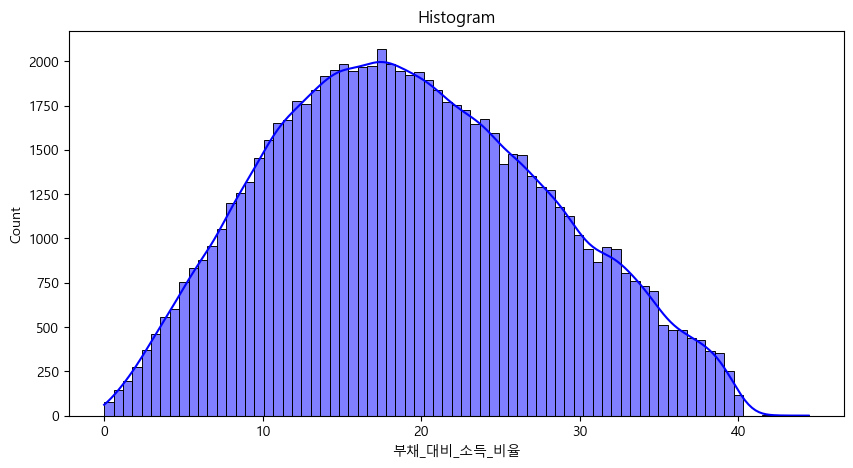

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['부채_대비_소득_비율'], kde=True, color='blue')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

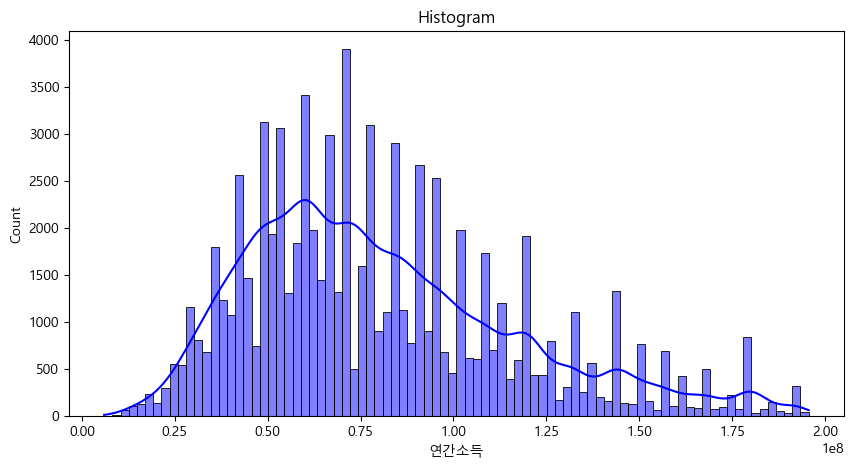

In [54]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['연간소득'], kde=True, color='blue')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

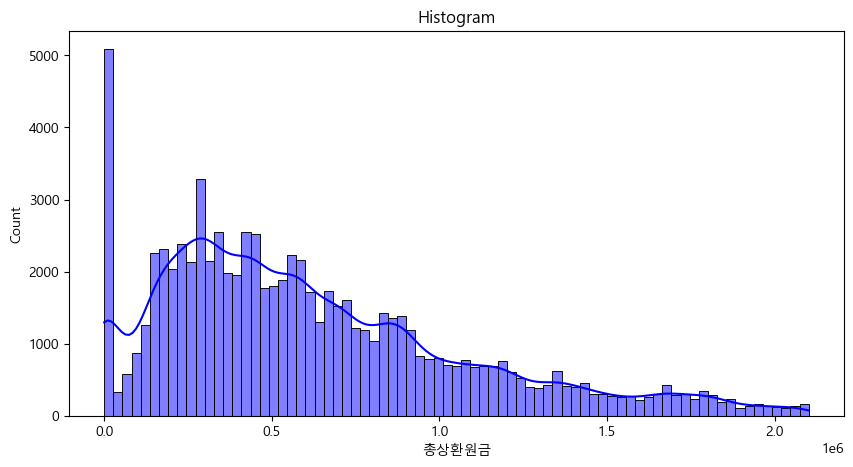

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['총상환원금'], kde=True, color='blue')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

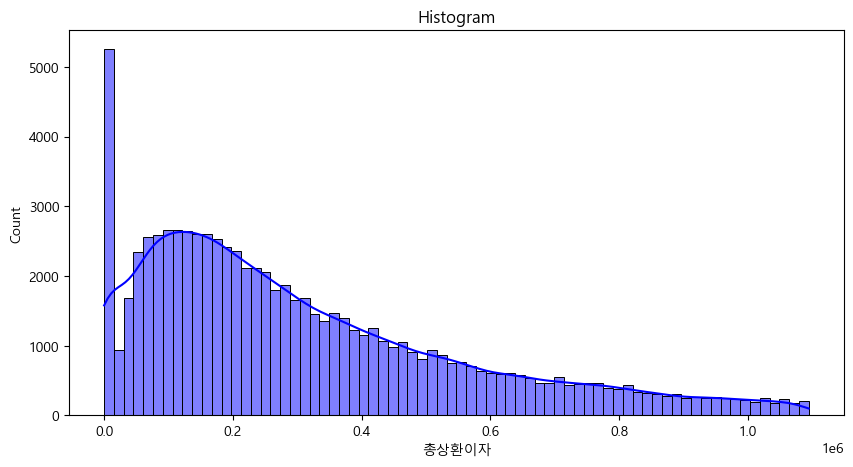

In [57]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['총상환이자'], kde=True, color='blue')
plt.title('Histogram')

Text(0.5, 1.0, 'Histogram')

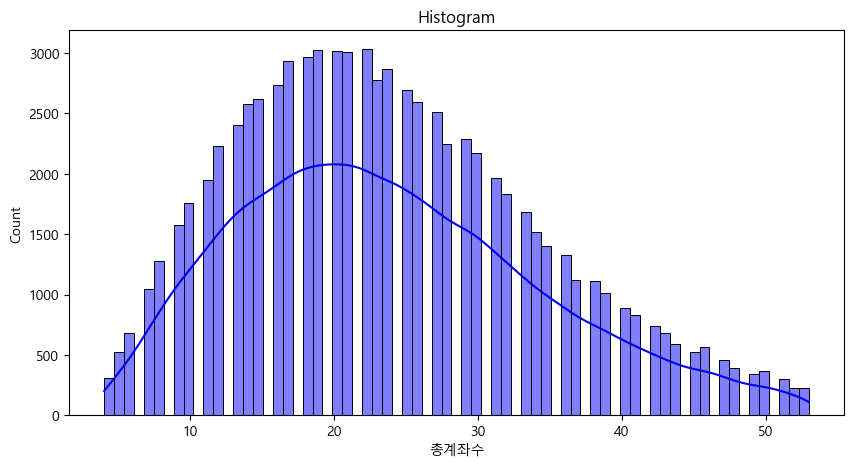

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(df2['총계좌수'], kde=True, color='blue')
plt.title('Histogram')

# 스케일링


 - MinMaxScaler : 연간소득, 총상환원금, 총상환이자, 총계좌수
 - StandardScaler : 부채_대비_소득_비율

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_sc = MinMaxScaler()
sd_sc = StandardScaler()

In [61]:
df2['연간소득_mm_sc'] = mm_sc.fit_transform(df2[['연간소득']])
df2.head(3)


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,6,0.348101
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,10,0.658228
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,5,0.474684


In [62]:
df2['총상환원금_mm_sc'] = mm_sc.fit_transform(df2[['총상환원금']])
df2.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc,총상환원금_mm_sc
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,6,0.348101,0.000000
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,10,0.658228,0.177737
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,5,0.474684,0.441828


In [63]:
df2['총상환이자_mm_sc'] = mm_sc.fit_transform(df2[['총상환이자']])
df2.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc,총상환원금_mm_sc,총상환이자_mm_sc
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,6,0.348101,0.000000,0.000000
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,10,0.658228,0.177737,0.213889
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,5,0.474684,0.441828,0.138850


In [64]:
df2['총계좌수_mm_sc'] = mm_sc.fit_transform(df2[['총계좌수']])
df2.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc,총상환원금_mm_sc,총상환이자_mm_sc,총계좌수_mm_sc
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,6,0.348101,0.000000,0.000000,0.224490
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,10,0.658228,0.177737,0.213889,0.346939
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,5,0.474684,0.441828,0.138850,0.204082


In [65]:
df2['부채_대비_소득_비율_sd_sc'] = sd_sc.fit_transform(df2[['부채_대비_소득_비율']])
df2.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,...,총상환이자,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc,총상환원금_mm_sc,총상환이자_mm_sc,총계좌수_mm_sc,부채_대비_소득_비율_sd_sc
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,...,0.0,0.0,0.0,C,6,0.348101,0.000000,0.000000,0.224490,-0.051628
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,...,234060.0,0.0,0.0,B,10,0.658228,0.177737,0.213889,0.346939,0.343150
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,...,151944.0,0.0,0.0,A,5,0.474684,0.441828,0.138850,0.204082,-1.237114


## 히스토그램

<Axes: xlabel='연간소득_mm_sc', ylabel='Count'>

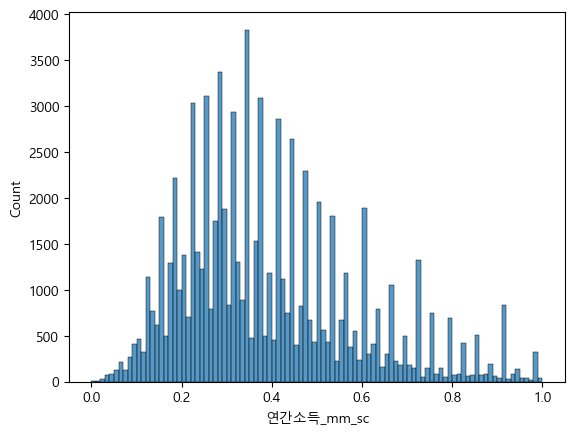

In [66]:
sns.histplot(df2['연간소득_mm_sc'], bins = 100)

<Axes: xlabel='총상환원금_mm_sc', ylabel='Count'>

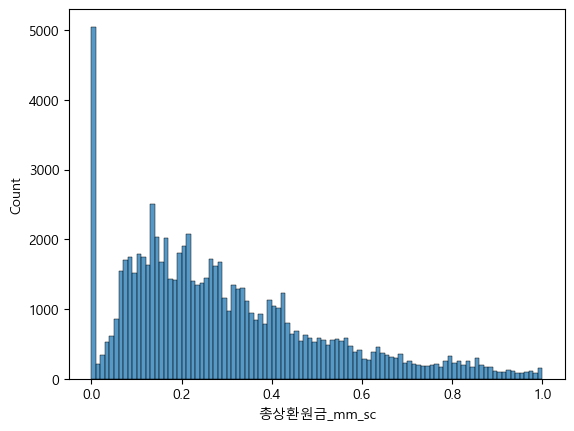

In [67]:
sns.histplot(df2['총상환원금_mm_sc'], bins = 100)

<Axes: xlabel='총상환이자_mm_sc', ylabel='Count'>

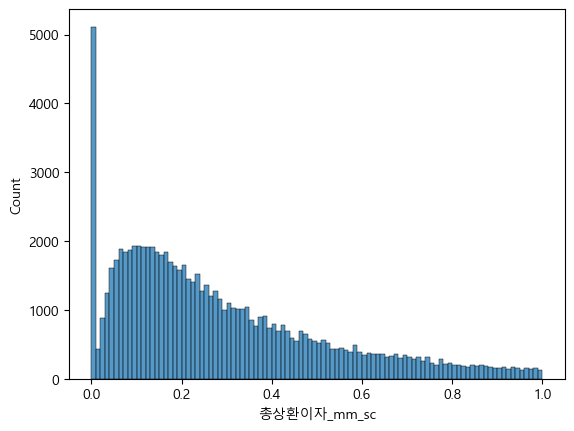

In [68]:
sns.histplot(df2['총상환이자_mm_sc'], bins = 100)

<Axes: xlabel='총계좌수_mm_sc', ylabel='Count'>

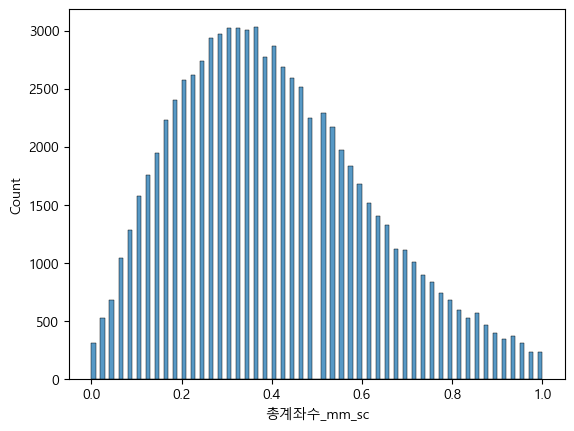

In [69]:
sns.histplot(df2['총계좌수_mm_sc'], bins = 100)

<Axes: xlabel='부채_대비_소득_비율_sd_sc', ylabel='Count'>

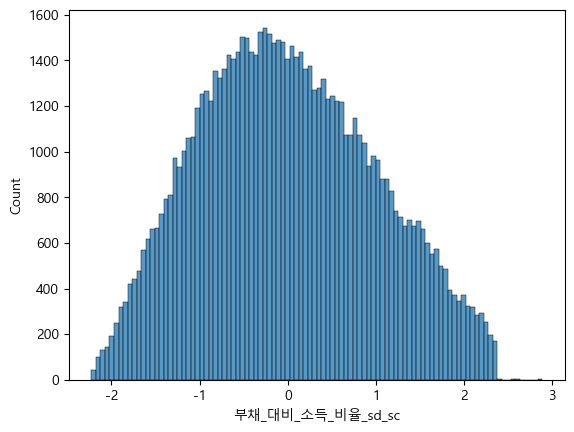

In [70]:
sns.histplot(df2['부채_대비_소득_비율_sd_sc'], bins = 100)

# 인코딩

- onehot : 대출기간, 주택소유상태, 대출목적
- label : 근로기간

In [71]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

In [72]:
le.fit(df2[['근로기간']])

c:\Users\w7e7r\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [74]:
df2['근로기간_le'] = le.transform(df2[['근로기간']])

c:\Users\w7e7r\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [75]:
df2.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,...,총연체금액,연체계좌수,대출등급,근로시간2,연간소득_mm_sc,총상환원금_mm_sc,총상환이자_mm_sc,총계좌수_mm_sc,부채_대비_소득_비율_sd_sc,근로기간_le
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,...,0.0,0.0,C,6,0.348101,0.000000,0.000000,0.224490,-0.051628,6
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,...,0.0,0.0,B,10,0.658228,0.177737,0.213889,0.346939,0.343150,1
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,...,0.0,0.0,A,5,0.474684,0.441828,0.138850,0.204082,-1.237114,5


In [84]:
oe.fit(df2[['대출기간']])

OneHotEncoder()

In [85]:
대출기간_csr = oe.transform(df2[['대출기간']])
대출기간_csr_df2 = pd.DataFrame(대출기간_csr.toarray(), columns = oe.get_feature_names_out())
대출기간_csr_df2.head(8)

,대출기간_ 36 months,대출기간_ 60 months
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0


In [80]:
oe.fit(df2[['주택소유상태']])

OneHotEncoder()

In [82]:
주택소유상태_csr = oe.transform(df2[['주택소유상태']])
주택소유상태_csr_df2 = pd.DataFrame(주택소유상태_csr.toarray(), columns = oe.get_feature_names_out())
주택소유상태_csr_df2.head(8)

,주택소유상태_ANY,주택소유상태_MORTGAGE,주택소유상태_OWN,주택소유상태_RENT
0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0
7,0.0,0.0,0.0,1.0


any 삭제했는데,,?

In [86]:
oe.fit(df2[['대출목적']])

OneHotEncoder()

In [87]:
대출목적_csr = oe.transform(df2[['대출목적']])
대출목적_csr_df2 = pd.DataFrame(대출목적_csr.toarray(), columns = oe.get_feature_names_out())
대출목적_csr_df2.head(8)

,대출목적_기타,대출목적_부채 통합,대출목적_소규모 사업,대출목적_신용 카드,대출목적_의료,대출목적_이사,대출목적_자동차,대출목적_재생 에너지,대출목적_주요 구매,대출목적_주택,대출목적_주택 개선,대출목적_휴가
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
